<hr style=\"height: 1px;\">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style=\"height: 1px;\">


## LECTURE 10: Deep Learning

This lecture will introduce important core concepts in deep learning.

The slides can be found [here](https://www.dropbox.com/s/cyqg2n7bdu0qbki/mit_8S50_deeplearning.pdf?dl=0)

    

### Setup

We will use PyTorch. You can set this up with
```
conda create --name 8.s05_dl python=3.6
conda install numpy matplotlib scipy jupyter pytorch scikit-learn pandas
conda activate 8.s05_dl
``` 
(you can get out of the existing environment, if necessary, with `conda deactivate`).

Let's check that everything is working:

In [1]:
import torch
print(torch.__version__)

1.9.0


You should see the PyTorch version printed properly.

## Machine Learning

Machine learning (ML) broadly describes the methods by which computers are able to learn mathematical models to describe data. If this sounds a little familiar don't be surprised: ML at its core is fitting.

ML involves three main components:

- Model
    - chosen mathematical model (depends on the task / available data)
- Learning
    - estimate statistical model from data 
- Prediction/Inference
    - use statistical model to make predictions on new data points and infer properties

### Supervised Learning

Given N examples with features ${x_i\in X}$ and targets ${y_i\in Y}$, learn function mapping $h(x)=y$.

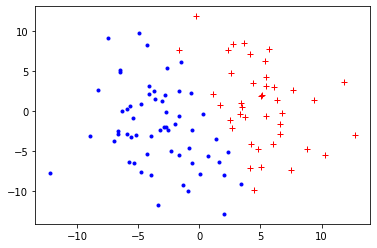

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#define points
x1 = np.random.normal(0, 5, 100) #mean, sigma, num_points
x2 = np.random.normal(0, 5, 100)

noise = 0. #sets the noise scale
x1noise = np.random.normal(0, noise, 100)
x2noise = np.random.normal(0, noise, 100)

mask_pos = x2 > (2. - 3.*x1)
mask_neg = x2 <= (2. - 3.*x1)

x1 = x1 + x1noise
x2 = x2 + x2noise

# lets define a true boundary between the two classes
# by x_2 = 2 - 3 x_1
x1_pos = x1[mask_pos]
x2_pos = x2[mask_pos]
x1_neg = x1[mask_neg]
x2_neg = x2[mask_neg]

#look at things
plt.plot(x1_pos, x2_pos, 'r+')
plt.plot(x1_neg, x2_neg, 'b.')

plt.show()

#### Classification

In classification tasks, $Y$ is a finite set of labels (i.e. classes). Can be:

- Binary classification ($Y={0,1}$) e.g. signal vs. background (or blue vs. red as we have here)

- Multi-class classification $Y={c_1,c_2,...,c_n}$) e.g. blue vs. red vs. green, or is this particle an electron or pion or photon? 
    - Multi-class labels are typically represented using "one-hot-encoding" or "one-hot-vectors": $y_i=(0,0,...,1,...,0)$ where the kth element is 1 and all other are 0 for class $c_k$.
        - For case of blue vs. red vs. green we could encode blue as $y_0=(1,0,0)$, red as $y_1=(0,1,0)$, green as $y_2=(0,0,1)$

#### Regression

In regression tasks, $Y$ is the real numbers
    - Instead of color, a real number at each point (equivalent to a 3-d scatter plot)

#### Procedure

- Design a function (model) with adjustable parameters
- Design a loss function
- Find best parameters which minimize loss
    - Use a labeled *training-set* to compute loss
    - Adjust parameters to reduce loss function
    - Repeat until parameters stabilize (minima)
- Estimate final performance on *test-set*


### Ex. 1 : Perceptron Algorithm

Basic classification: two inputs, two classes (denoted by -1 and +1)

Linear model: $f(x|w,b) = \textrm{sign}(w^{T}x+b)$ = $\textrm{sign}(w_1x_1+w_2x_2+b)$

Loss: $L_i = \textrm{max}[0,-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$

Issue: No way to distinguish two solutions. Is $x_2 = 2 - 3.001 x_1$ a better solution that $x_2 = 2 - 3 x_1$ in this case?

In [2]:
def perceptron_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = np.sign(x[0][i]*w[0]+x[1][i]*w[1]+b)
        loss = loss + max(0.,-1.*y[i]*fm)
    return loss

x_list = [np.concatenate((x1_pos,x1_neg)),np.concatenate((x2_pos,x2_neg))]
y_list = [1.]*len(x1_pos) + [-1.]*len(x1_neg)

print("Perceptron loss (w1=3, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.))
print("Perceptron loss (w1=3, w2=1, b=-10.)")
print(perceptron_loss(x_list,y_list,[3.,1.],-10.))
print("Perceptron loss (w1=3.001, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.1))

Perceptron loss (w1=3, w2=1, b=-2)
0.0
Perceptron loss (w1=3, w2=1, b=-10.)
19.0
Perceptron loss (w1=3.001, w2=1, b=-2)
0.0


#### Ex. 2 : Support Vector Machine

Similar to perceptron algorithm, modify loss to select maximally discriminant parameters:

Linear model: $f(x|w,b) = w^{T}x+b$
Classifier: $\textrm{sign}(f(x|w,b))$

Loss: $L_i = \textrm{max}[0,1-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$


In [5]:
def svm_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = x[0][i]*w[0]+x[1][i]*w[1]+b
        loss = loss + max(0.,1.-1.*y[i]*fm)
    return loss

print("SVM loss (w1=3, w2=1, b=-2)")
print(svm_loss(x_list,y_list,[3.,1.],-2.))
print("SVM loss (w1=3, w2=1, b=-1.9)")
print(svm_loss(x_list,y_list,[3.,1.],-1.9))
print("SVM loss (w1=3, w2=1, b=-2.1)")
print(svm_loss(x_list,y_list,[3.,1.],-2.1))

SVM loss (w1=3, w2=1, b=-2)
2.6346655245245474
SVM loss (w1=3, w2=1, b=-1.9)
2.434665524524547
SVM loss (w1=3, w2=1, b=-2.1)
2.9000079913890286


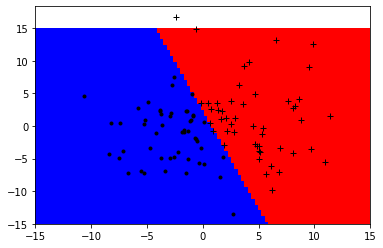

In [4]:
#create grid
x1_list = np.linspace(-15., 15., 100)
x2_list = np.linspace(-15., 15., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)

#fill with model value
h_grid = np.sign(x2_grid - (2.1 - 3.*x1_grid))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

Better... but what we really want is a probabilistic model. For data points we haven't seen, and more complex data, we want the algorithm to produce its confidence in the prediction.


#### Ex. 3 : Logistic regression

Change from \[-1,1\] to \[0,1\] for simplicity

Model: $f(x|w,b)=\frac{1}{1+e^{-(w^{T}x+b)}}$

Loss: $L_i = y_i \log(f(x_i|w,b)) + (1-y_i)\log(1-f(x_i|w,b))$
    (known as *Binary Cross Entropy*)

In [6]:
#switch to [0,1] from [-1,1]

y_list_0 = [1.]*len(x1_pos) + [0.]*len(x1_neg)

def lr_loss(x,y,w,b,scale=1.):
    loss = 0.
    for i in range(len(x[0])):
        expon = -1.*scale*(x[0][i]*w[0]+x[1][i]*w[1]+b)
        if (expon > 99.):
            expon = 99.
        fm = 1./(1.+np.exp(expon))
        if (fm < 1. and fm > 0.):
            loss = loss - y[i]*np.log(fm) - (1.-y[i])*np.log(1.-fm)
    return loss

print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.))
print("Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-1.9))
print("Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.1))
print("")
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.,1.5))
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2,0.5))

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]
3.163762487543591
Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]
3.152145611418303
Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]
3.195084938817922

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]
2.0418633313274475
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]
6.4943225069844654


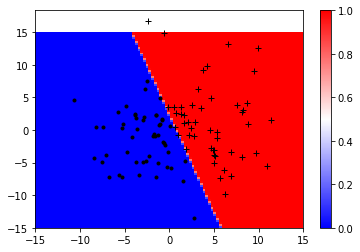

In [9]:
#fill with model value
h_grid = 1./(1.+np.exp(-1.*10*(x2_grid - (2. - 3.*x1_grid))))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

This is a neural network! No hidden layers, two inputs, one output neuron with a sigmoid activation.

https://playground.tensorflow.org/

How do we train? How do we handle more complicated data?

In [3]:
import h5py
import pandas as pd

treename = 'l1pf_egm_reg'

VARS = ['pt', 'eta', 'phi', 'energy',
  'e2x2', 'e2x5', 'e3x5', 'e5x5', 'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'hoE', 'bremStrength', 'ecalIso', 'crystalCount',#4
  'lowerSideLobePt','upperSideLobePt',#2
  'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p',#4
  'sihih','sipip','sigetaeta','sigphiphi','sigetaphi',#5
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
  'gen_match']

filename = 'xtalTuple_TTbar_PU0.z'

h5file = h5py.File(filename, 'r') # open read-only
params = h5file[treename][()]

df = pd.DataFrame(params,columns=VARS)

TODROP = [
  'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
]

df = df.drop(TODROP, axis=1) #remove custom variables

for ie in ['e2x2', 'e2x5', 'e3x5', 'e5x5']:
    df[ie] /= df['energy']


df['isPU'] = pd.Series(df['gen_match']==0, index=df.index, dtype='i4')
df['isEG'] = pd.Series(df['gen_match']==1, index=df.index, dtype='i4')

MINPT = 0.5
MAXPT = 100.
df = df.loc[(df['pt']>MINPT) & (df['pt']<MAXPT) & (abs(df['eta'])<1.3)]
df.fillna(0., inplace=True)

df0 = df[df['gen_match']==0].head(100000)
df1 = df[df['gen_match']==1].head(10000)

df = pd.concat([df0, df1], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

print(df)
print(sum(df['gen_match']==0))
print(sum(df['gen_match']==1))


               pt       eta       phi     energy      e2x2      e2x5  \
0        8.816619  0.219428 -2.940355   9.029726  0.397758  0.397758   
1       11.225744  0.621598  1.574664  13.465201  0.689801  0.689801   
2       20.855284 -0.521915 -1.535256  23.760786  0.628315  0.628315   
3       12.638436  1.081803 -1.882852  20.783759  0.671752  0.741738   
4       12.950458  0.014400 -0.401350  12.951800  0.472940  0.472940   
...           ...       ...       ...        ...       ...       ...   
109995  13.412932 -1.094230  1.154258  22.276730  0.538100  0.584741   
109996  18.228210 -1.121395  2.917732  30.941992  0.271680  0.473195   
109997   8.816232 -0.328118  1.720033   9.295088  0.637945  0.637945   
109998  16.604776  0.276332  2.259708  17.242785  0.760328  0.760328   
109999  14.642067  0.752208  0.208395  18.983469  0.751244  0.751244   

            e3x5      e5x5       hoE  bremStrength  ...  phiStripContiguous3p  \
0       0.397758  0.454139  0.904091      0.549039  ..

['pt', 'eta', 'phi', 'energy', 'e2x2', 'e2x5', 'e3x5', 'e5x5', 'hoE', 'bremStrength', 'ecalIso', 'crystalCount', 'lowerSideLobePt', 'upperSideLobePt', 'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p', 'sihih', 'sipip', 'sigetaeta', 'sigphiphi', 'sigetaphi', 'gen_match', 'isPU', 'isEG']


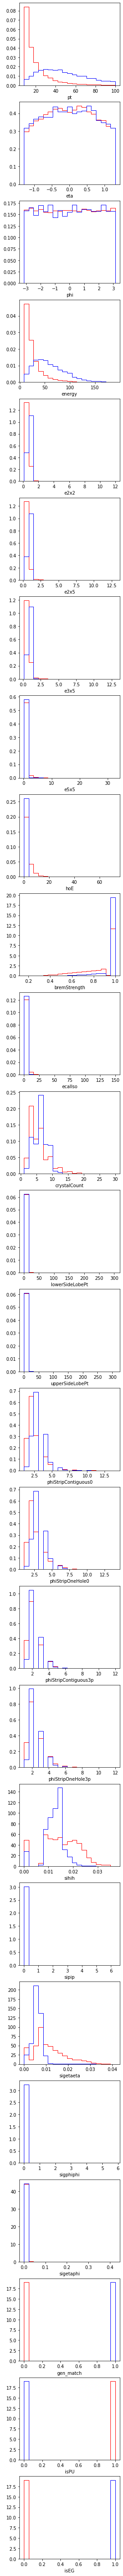

In [11]:
col_names = list(df.columns)
print(col_names)

fig, axs = plt.subplots(len(col_names),1,figsize=(4,4*len(col_names)))
for ix,ax in enumerate(axs):
    ax.hist(df[col_names[ix]][df['gen_match']==0],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='r',density=True)
    ax.hist(df[col_names[ix]][df['gen_match']==1],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='b',density=True)
    ax.set_xlabel(col_names[ix])

plt.show()

In [12]:
fig, axs = plt.subplots(len(col_names)-4,len(col_names)-4,figsize=(8*len(col_names),8*len(col_names)))
for ix in range(len(col_names)-3):
    for iy in range(ix):
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==0],df[col_names[iy]][df['gen_match']==0],'r+')
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==1],df[col_names[iy]][df['gen_match']==1],'b.')
        axs[ix-1,iy].set_xlabel(col_names[ix])
        axs[ix-1,iy].set_ylabel(col_names[iy])

plt.show()

Lets make a simple logistic regression network on this data to differentiate between pileup data (PU) and electron and photons (EG).

An important component of training a neural network is preparing the input. It is typical to split the data you have into different sets. Three are common: "training", "testing", and "validation".
Here we use 30% of the data for testing and 70% for training and validation, with that data split 80%/20% for training/validation.
PyTorch uses `dataloaders` which help handle batching, etc.

In [4]:
import torch 

dataset = df.values

X = dataset[:,4:-3]
#last 3 columns are labels
ninputs = len(list(df.columns))-3-4

Y = dataset[:,-1:]
#last column will be used for the label

test_frac = 0.3
val_frac = 0.2

torch.random.manual_seed(42) # fix a random seed for reproducibility
alldataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32))

testdataset, trainvaldataset = torch.utils.data.random_split(
    alldataset, [int(len(Y)*test_frac),
              int(len(Y)*(1-test_frac))])

traindataset, valdataset = torch.utils.data.random_split(
    trainvaldataset, [int(len(Y)*(1.-test_frac)*(1.-val_frac)),
              int(len(Y)*(1.-test_frac)*val_frac)])

testloader = torch.utils.data.DataLoader(testdataset,
                                          num_workers=6,
                                          batch_size=500,
                                          shuffle=False)
trainloader = torch.utils.data.DataLoader(traindataset,
                                          num_workers=6,
                                          batch_size=500,
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valdataset,
                                        num_workers=6,
                                        batch_size=500,
                                        shuffle=False)


Now we define our network architecture and the connections. Lets start with the kind of logistic regression network we saw already.

PyTorch requires that we first define the layers we want to use in `__init__()` (here we build using standard library layers), and then we define the connection in `forward()`. This setup will allow PyTorch to construct the backward pass automatically, although for more complex or specialized networks it is possible to define the backward pass manually.

In [5]:
class LR_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.output(x)
        return x
    

model_lr = LR_net()
print(model_lr)
print('----------')
print(model_lr.state_dict())

LR_net(
  (fc1): Linear(in_features=19, out_features=1, bias=True)
  (output): Sigmoid()
)
----------
OrderedDict([('fc1.weight', tensor([[-0.2122, -0.0845,  0.1981, -0.0629, -0.1480, -0.0074, -0.1670, -0.0955,
         -0.0912, -0.0133,  0.2149,  0.2267,  0.0510, -0.0540,  0.1568,  0.0791,
         -0.0733, -0.0842, -0.2246]])), ('fc1.bias', tensor([0.1488]))])


Now lets train! We do this using the `Adam` optimizer and binary cross entropy loss (as before).

In [9]:
criterion = torch.nn.BCELoss()
optimizer_lr = torch.optim.Adam(model_lr.parameters(), lr=0.003) 

history_lr = {'loss':[], 'val_loss':[]}

for epoch in range(20):

    current_loss = 0.0 #rezero loss
    
    for i, data in enumerate(trainloader):

        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_lr.zero_grad()

        # forward + backward + optimize (training magic)
        # This will use the pytorch autograd feature to adjust the
        ## parameters of our function to minimize the loss
        outputs = model_lr(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_lr.step()
        
        # add loss statistics
        current_loss += loss.item()
        
        if i == len(trainloader)-1:
            current_val_loss = 0.0
            with torch.no_grad():#disable updating gradient
                for iv, vdata in enumerate(valloader):
                    val_inputs, val_labels = vdata
                    val_loss = criterion(model_lr(val_inputs), val_labels)
                    current_val_loss += val_loss.item()
            print('[%d, %4d] loss: %.4f  val loss: %.4f' % 
                  (epoch + 1, i + 1, current_loss/float(i+1) , current_val_loss/float(len(valloader))))

            history_lr['loss'].append(current_loss/float(i+1))
            history_lr['val_loss'].append(current_val_loss/float(len(valloader)))
            
print('Finished Training')
torch.save(model_lr.state_dict(), 'lr_model.pt')
print(model_lr.state_dict())

RuntimeError: DataLoader worker (pid 78581) is killed by signal: Unknown signal: 0. 

Ok, how is the training doing? Lets visualize the evolution of the loss by epoch.

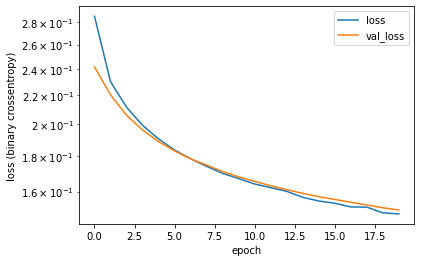

In [8]:
plt.semilogy(history_lr['loss'], label='loss')
plt.semilogy(history_lr['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

You may have heard of overtraining. Lets define a "stopping criteria" by using the validation loss. We will stop the training if the validation loss appears to have hit its minimum (but we will give it a few epochs to allow for local minimum or single-epoch spikes. There are other ways to define an early stopping criteria but this will do for now.

In [9]:
def train(model,trainloader,valloader,nepochs=100,lr=0.003,l2reg=0.,patience=5,name=None):

    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2reg) 

    history = {'loss':[], 'val_loss':[]}

    min_loss = 999999.
    min_epoch = 0
    min_model = model.state_dict()
    should_stop = False
    
    for epoch in range(nepochs):

        current_loss = 0.0 #rezero loss

        for i, data in enumerate(trainloader):

            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            # This will use the pytorch autograd feature to adjust the
            ## parameters of our function to minimize the loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            current_loss += loss.item()

            if i == len(trainloader)-1:
                current_val_loss = 0.0
                with torch.no_grad():#disable updating gradient
                    model.eval() #place model in evaluation state
                                ## necessary for some layer types (like dropout)
                    for iv, vdata in enumerate(valloader):
                        val_inputs, val_labels = vdata
                        val_loss = criterion(model(val_inputs), val_labels)
                        current_val_loss += val_loss.item()
                    model.train() #return to training state
                current_loss = current_loss/float(i+1)
                current_val_loss = current_val_loss/float(len(valloader))
                print('[%d, %4d] loss: %.4f  val loss: %.4f' % 
                      (epoch + 1, i + 1, current_loss , current_val_loss))

                if current_val_loss < min_loss:
                    min_loss = current_val_loss
                    min_model = model.state_dict()
                    min_epoch = epoch
                elif epoch-min_epoch==5:
                    model.load_state_dict(min_model)
                    should_stop = True
                    break

                history['loss'].append(current_loss)
                history['val_loss'].append(current_val_loss)
                
            if should_stop:
                break

    print('Finished Training')
    if name is not None:
        torch.save(model.state_dict(), '%s.pt'%name)
    return history

In [10]:
history_lr = train(model_lr,trainloader,valloader,name='lr_model')

[1,  124] loss: 0.1464  val loss: 0.1482
[2,  124] loss: 0.1438  val loss: 0.1457
[3,  124] loss: 0.1424  val loss: 0.1441
[4,  124] loss: 0.1414  val loss: 0.1424
[5,  124] loss: 0.1397  val loss: 0.1414
[6,  124] loss: 0.1388  val loss: 0.1405
[7,  124] loss: 0.1416  val loss: 0.1388
[8,  124] loss: 0.1384  val loss: 0.1378
[9,  124] loss: 0.1378  val loss: 0.1371
[10,  124] loss: 0.1374  val loss: 0.1364
[11,  124] loss: 0.1365  val loss: 0.1355
[12,  124] loss: 0.1380  val loss: 0.1348
[13,  124] loss: 0.1368  val loss: 0.1344
[14,  124] loss: 0.1364  val loss: 0.1346
[15,  124] loss: 0.1364  val loss: 0.1335
[16,  124] loss: 0.1359  val loss: 0.1332
[17,  124] loss: 0.1352  val loss: 0.1329
[18,  124] loss: 0.1359  val loss: 0.1324
[19,  124] loss: 0.1349  val loss: 0.1328
[20,  124] loss: 0.1344  val loss: 0.1318
[21,  124] loss: 0.1341  val loss: 0.1315
[22,  124] loss: 0.1349  val loss: 0.1311
[23,  124] loss: 0.1338  val loss: 0.1308
[24,  124] loss: 0.1335  val loss: 0.1306
[

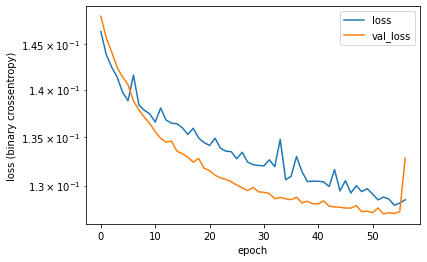

In [11]:
plt.semilogy(history_lr['loss'], label='loss')
plt.semilogy(history_lr['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

Now lets see how to apply this network to our test data. This is essentially the same setup we used for the validation data.

In [12]:
def apply(model, testloader):
    with torch.no_grad():
        model.eval()
        outputs = []
        labels = []
        for data in testloader:
            test_inputs, test_labels = data
            outputs.append(model(test_inputs).numpy())
            labels.append(test_labels.numpy())
        model.train()

        Y_test_predict = outputs
        Y_test = labels

    Y_test_predict = np.concatenate(Y_test_predict)
    Y_test = np.concatenate(Y_test)
    
    return Y_test_predict,Y_test

Y_test_predict_lr, Y_test = apply(model_lr, testloader)

print(Y_test_predict_lr.shape)
print(Y_test.shape)

(33000, 1)
(33000, 1)


And now lets plot the distribution of the output of the network. As we wanted, the PU (red) is peaked at 0, while the EG (blue) is closer to 1. 

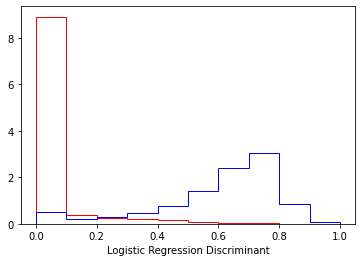

In [13]:
plt.hist(Y_test_predict_lr[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_lr[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('Logistic Regression Discriminant')
plt.show()

Ok, but a logistic regression is the simplest thing. What about hidden layers?

In [14]:
class MLP2_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,30)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(30,10)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.output(x)
        return x
    

model_mlp_2layer = MLP2_net()
print(model_mlp_2layer)

MLP2_net(
  (fc1): Linear(in_features=19, out_features=30, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


In [15]:
history_mlp_2layer = train(model_mlp_2layer,trainloader,valloader,name='mlp_2layer_model')
Y_test_predict_mlp_2layer, Y_test = apply(model_mlp_2layer, testloader)

[1,  124] loss: 0.2519  val loss: 0.1493
[2,  124] loss: 0.1246  val loss: 0.1143
[3,  124] loss: 0.1073  val loss: 0.1050
[4,  124] loss: 0.0995  val loss: 0.1000
[5,  124] loss: 0.0936  val loss: 0.0951
[6,  124] loss: 0.0905  val loss: 0.0919
[7,  124] loss: 0.0920  val loss: 0.0915
[8,  124] loss: 0.0902  val loss: 0.0913
[9,  124] loss: 0.0900  val loss: 0.0940
[10,  124] loss: 0.0902  val loss: 0.0894
[11,  124] loss: 0.0890  val loss: 0.0923
[12,  124] loss: 0.0883  val loss: 0.0901
[13,  124] loss: 0.0878  val loss: 0.0870
[14,  124] loss: 0.0867  val loss: 0.0905
[15,  124] loss: 0.0870  val loss: 0.0886
[16,  124] loss: 0.0857  val loss: 0.0879
[17,  124] loss: 0.0870  val loss: 0.0895
[18,  124] loss: 0.0862  val loss: 0.0860
[19,  124] loss: 0.0859  val loss: 0.0856
[20,  124] loss: 0.0852  val loss: 0.0857
[21,  124] loss: 0.0847  val loss: 0.0891
[22,  124] loss: 0.0851  val loss: 0.0845
[23,  124] loss: 0.0849  val loss: 0.0848
[24,  124] loss: 0.0857  val loss: 0.0879
[

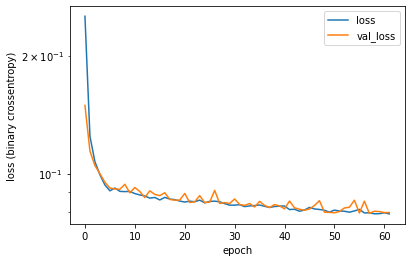

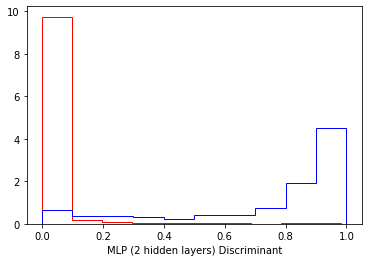

In [16]:
plt.semilogy(history_mlp_2layer['loss'], label='loss')
plt.semilogy(history_mlp_2layer['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

plt.hist(Y_test_predict_mlp_2layer[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_mlp_2layer[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('MLP (2 hidden layers) Discriminant')
plt.show()

This looks better than the logistic regression. But how would we establish that? A Receiver Operating Characteristic (ROC) curve is a typical way to compare multiple algorithms. Basically we are going to make a requirement on the NN output: if it is below a given value we will call it PU, and if it is above that value its EG. Then we compute how good this is at predicting the true labels. We can scan this cutoff value between 0 and 1 and then plot each point.

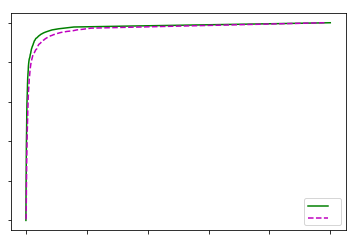

In [21]:
def compute_ROC(labels, predicts, npts=101):
    cutvals = np.linspace(0.,1.,num=npts)
    tot0 = float(len(labels[labels==0]))
    tot1 = float(len(labels[labels==1]))
    tpr = []
    fpr = []
    for c in cutvals:
        fpr.append(float(len(predicts[(labels==0) & (predicts>c)]))/tot0)
        tpr.append(float(len(predicts[(labels==1) & (predicts>c)]))/tot1)
    
    return np.array(fpr),np.array(tpr)

mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

So the MLP we made is indeed a bit better, especially if we want to classify the background very well.

Lets try a larger network. 

In [22]:
class MLP3_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x
    

model_mlp_3layer = MLP3_net()
print(model_mlp_3layer)

MLP3_net(
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


Lets also try to use a form of regularization, in this case L2. If left unchecked, larger networks especially can begin to find and abuse certain subtle features that we perhaps don't want them to. The obvious case is if the feature is only present in the training set then we may be hurting ourselves by focusing on that. L2 regularization adds a "penalty term" to the loss function which is a function of the magnitude squared of the weight values. 

$\mathcal{L} = \mathcal{L}_\textrm{BCE} + \lambda\sum |W|^2$

We can control the relative importance of this term via the $\lambda$ parameter. By encouraging the network to keep the weights small, it is less able to magnify the importance of one particular feature/node.

In [24]:
history_mlp_3layer = train(model_mlp_3layer,trainloader,valloader,l2reg=0.0001,name='mlp_3layer_model')
Y_test_predict_mlp_3layer, Y_test = apply(model_mlp_3layer, testloader)

RuntimeError: DataLoader worker (pid 78482) is killed by signal: Unknown signal: 0. 

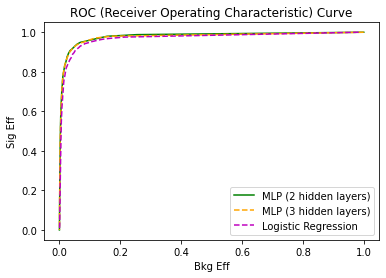

In [26]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("Bkg Eff")
plt.ylabel("Sig Eff")
plt.legend(loc="lower right")
plt.show()

Its hard to tell... Luckily we are not required to plot $\epsilon_{s}$ and $\epsilon_{b}$. Lets use $1/\epsilon_{b}$ instead of $\epsilon_{b}$ to really bring out the behavior for low $\epsilon_{b}$.

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


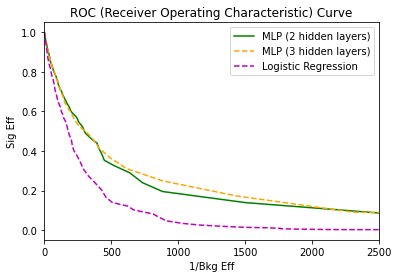

In [27]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer,101)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer,101)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr,101)

plt.plot(1./mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(1./lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("1/Bkg Eff")
plt.xlim([-1, 2500])
plt.ylabel("Sig Eff")
plt.legend(loc="upper right")
plt.show()

Lets try two other types of regularizer to finish: *batch normalization* and *dropout*.

Batch normalization works by rescaling each input such that the mean and standard deviation are 0 and 1, respectively. This helps make sure that each node has similar values when it is passed to the following layer.

Dropout works by randomly removing a given fraction of the nodes in a layer each training pass. This helps ensure that no one node becomes crucially important to the final result.

In [28]:
class MLP3_BN_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0 = torch.nn.BatchNorm1d(ninputs)
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(50)
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.bn2 = torch.nn.BatchNorm1d(30)
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.bn3 = torch.nn.BatchNorm1d(10)
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.bn0(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.bn3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x
    
class MLP3_Drop_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.drop1 = torch.nn.Dropout(0.1)
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.drop2 = torch.nn.Dropout(0.1)
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.drop3 = torch.nn.Dropout(0.1)
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.drop1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.drop2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.drop3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x

model_mlp_3layer_bn = MLP3_BN_net()
print(model_mlp_3layer_bn)

model_mlp_3layer_drop = MLP3_Drop_net()
print(model_mlp_3layer_drop)

MLP3_BN_net(
  (bn0): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (bn1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (bn2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act3): ReLU()
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)
MLP3_Drop_net(
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (drop2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act

In [29]:
history_mlp_3layer_bn = train(model_mlp_3layer_bn,trainloader,valloader,name='mlp_3layer_bn_model')
Y_test_predict_mlp_3layer_bn, Y_test = apply(model_mlp_3layer_bn, testloader)

[1,  124] loss: 0.3137  val loss: 0.1384
[2,  124] loss: 0.1115  val loss: 0.0994
[3,  124] loss: 0.0896  val loss: 0.1287
[4,  124] loss: 0.0828  val loss: 0.1003
[5,  124] loss: 0.0797  val loss: 0.0822
[6,  124] loss: 0.0792  val loss: 0.0980
[7,  124] loss: 0.0767  val loss: 0.0990
[8,  124] loss: 0.0768  val loss: 0.1215
[9,  124] loss: 0.0763  val loss: 0.0807
[10,  124] loss: 0.0744  val loss: 0.1600
[11,  124] loss: 0.0735  val loss: 0.1390
[12,  124] loss: 0.0740  val loss: 0.1302
[13,  124] loss: 0.0735  val loss: 0.1563
[14,  124] loss: 0.0728  val loss: 0.0865
Finished Training


In [30]:
history_mlp_3layer_drop = train(model_mlp_3layer_drop,trainloader,valloader,name='mlp_3layer_drop_model')
Y_test_predict_mlp_3layer_drop, Y_test = apply(model_mlp_3layer_drop, testloader)

[1,  124] loss: 0.2415  val loss: 0.1582
[2,  124] loss: 0.1281  val loss: 0.1140
[3,  124] loss: 0.1110  val loss: 0.1031
[4,  124] loss: 0.1036  val loss: 0.1078
[5,  124] loss: 0.1008  val loss: 0.0950
[6,  124] loss: 0.0988  val loss: 0.0927
[7,  124] loss: 0.0992  val loss: 0.0949
[8,  124] loss: 0.0955  val loss: 0.0959
[9,  124] loss: 0.0948  val loss: 0.0915
[10,  124] loss: 0.0935  val loss: 0.0920
[11,  124] loss: 0.0924  val loss: 0.0954
[12,  124] loss: 0.0904  val loss: 0.0875
[13,  124] loss: 0.0903  val loss: 0.0876
[14,  124] loss: 0.0905  val loss: 0.0903
[15,  124] loss: 0.0907  val loss: 0.0861
[16,  124] loss: 0.0888  val loss: 0.0901
[17,  124] loss: 0.0880  val loss: 0.0867
[18,  124] loss: 0.0857  val loss: 0.0881
[19,  124] loss: 0.0859  val loss: 0.0879
[20,  124] loss: 0.0852  val loss: 0.0847
[21,  124] loss: 0.0854  val loss: 0.0831
[22,  124] loss: 0.0838  val loss: 0.0846
[23,  124] loss: 0.0838  val loss: 0.0849
[24,  124] loss: 0.0835  val loss: 0.0854
[

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


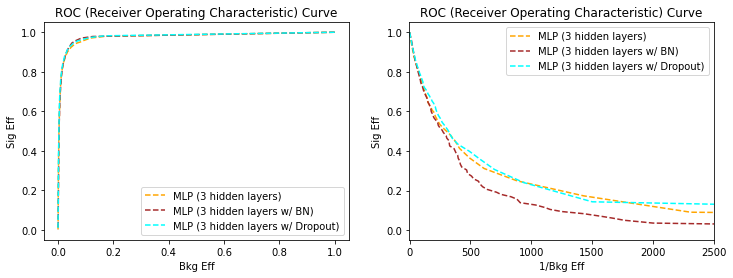

In [31]:
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer,101)
mlp_3layer_bn_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer_bn,101)
mlp_3layer_drop_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer_drop,101)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax1.plot(mlp_3layer_bn_rocpts[0],mlp_3layer_bn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ BN)")
ax1.plot(mlp_3layer_drop_rocpts[0],mlp_3layer_drop_rocpts[1],'--',color='cyan',label="MLP (3 hidden layers w/ Dropout)")
ax1.set_title("ROC (Receiver Operating Characteristic) Curve")
ax1.set_xlabel("Bkg Eff")
ax1.set_ylabel("Sig Eff")
ax1.legend(loc="lower right")

ax2.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax2.plot(1./mlp_3layer_bn_rocpts[0],mlp_3layer_bn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ BN)")
ax2.plot(1./mlp_3layer_drop_rocpts[0],mlp_3layer_drop_rocpts[1],'--',color='cyan',label="MLP (3 hidden layers w/ Dropout)")
ax2.set_title("ROC (Receiver Operating Characteristic) Curve")
ax2.set_xlabel("1/Bkg Eff")
ax2.set_xlim([-1, 2500])
ax2.set_ylabel("Sig Eff")
ax2.legend(loc="upper right")

plt.show()

You should now have all the tools you need to start developing, training, and testing your own own neural networks!